In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [17]:
# =======================
# Cargar los parámetros
# =======================
ruta_txt = "/home/felipe/Documents/Proyectos doctorado/horneros/figuras_sintesis/parametros_B.txt"
data_param = np.loadtxt(ruta_txt, skiprows=1)  # salta el encabezado

tiempo_comun = data_param[:, 0]
beta_interp = data_param[:, 1]
f_cero_interp = data_param[:, 2]
tension_interp = data_param[:, 3]

# =======================
# Cargar los audios
# =======================
samplerate_real, data_sonido = wavfile.read('/home/felipe/Documents/Proyectos doctorado/horneros/audios/audios_sintesis/HA061020041409-solo_hembra_recorte.wav')
samplerate_sint, sonido_filtrado = wavfile.read('/home/felipe/Documents/Proyectos doctorado/horneros/audios/audios_sintesis/audios_nuevos/sintesis_A.wav')

## Normalización por seguridad (si es int16)
if data_sonido.dtype != np.float32:
    data_sonido = data_sonido / np.max(np.abs(data_sonido))

if sonido_filtrado.dtype != np.float32:
    sonido_filtrado = sonido_filtrado / np.max(np.abs(sonido_filtrado))

# =======================
# Definir señal a graficar
# =======================
# Por ejemplo, la envolvente del sintetizado
#senal_analitica = sonido_filtrado
sonido = sonido_filtrado

# Interpolar si longitudes no coinciden
from scipy.interpolate import interp1d
tiempo_audio = np.linspace(tiempo_comun[0], tiempo_comun[-1], len(sonido))
interpolador = interp1d(tiempo_audio, sonido, bounds_error=False, fill_value="extrapolate")
sonido = interpolador(tiempo_comun)


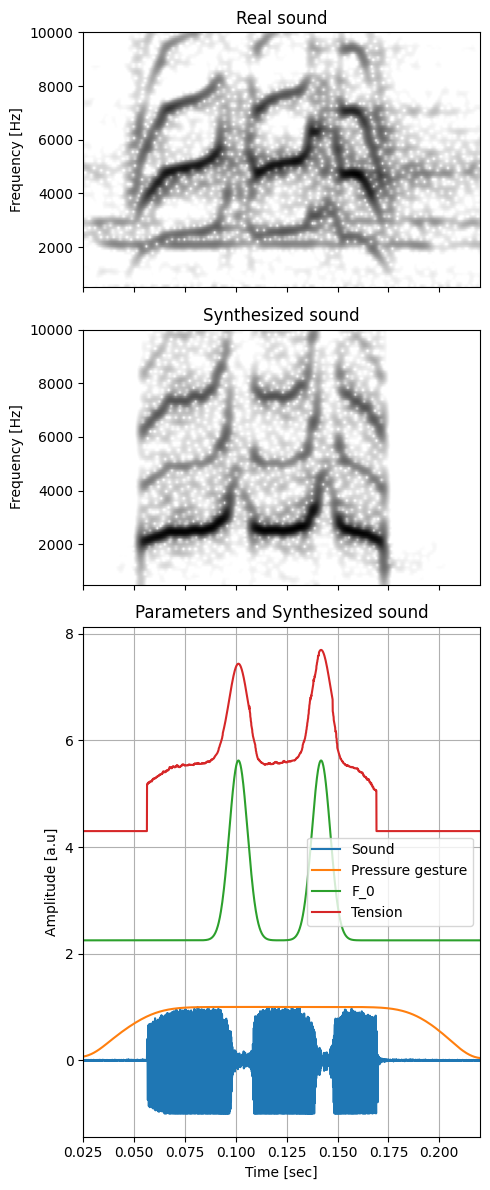

In [20]:
# =======================
# Generar la figura
# =======================

fig, ax = plt.subplots(3, 1, figsize=(5, 12), sharex=True,
                       gridspec_kw={'height_ratios': [1, 1, 2]})

# Espectrograma 1 (sintetizado)
f1, t_spec1, Sxx1 = signal.spectrogram(
    sonido_filtrado, fs=samplerate_sint, window=('gaussian', 64),
    nperseg=512, noverlap=510, scaling='spectrum'
)
Sxx1 = np.clip(Sxx1, a_min=np.amax(Sxx1) / 1e5, a_max=np.amax(Sxx1))
extent1 = [tiempo_comun[0], tiempo_comun[-1], f1[0], f1[-1]]
ax[1].imshow(np.log10(Sxx1), aspect='auto', origin='lower',
             extent=extent1, cmap='Greys', rasterized=True)
ax[1].set_ylim(500, 10000)
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_title('Synthesized sound')

# Espectrograma 2 (real)
f2, t_spec2, Sxx2 = signal.spectrogram(
    data_sonido, fs=samplerate_real, window=('gaussian', 64),
    nperseg=512, noverlap=510, scaling='spectrum'
)
Sxx2 = np.clip(Sxx2, a_min=np.amax(Sxx2) / 1e5, a_max=np.amax(Sxx2))
extent2 = [tiempo_comun[0], tiempo_comun[-1], f2[0], f2[-1]]
ax[0].imshow(np.log10(Sxx2), aspect='auto', origin='lower',
             extent=extent2, cmap='Greys', rasterized=True)
ax[0].set_ylim(500, 10000)
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_title('Real sound')

# Parámetros y envolvente
ax[2].plot(tiempo_comun, sonido, label='Sound')
ax[2].plot(tiempo_comun, beta_interp, label='Pressure gesture')
ax[2].plot(tiempo_comun, f_cero_interp / 2 + 2, label='F_0')
ax[2].plot(tiempo_comun, tension_interp + 4, label='Tension')
ax[2].set_ylabel('Amplitude [a.u]')
ax[2].set_xlabel('Time [sec]')
ax[2].set_title('Parameters and Synthesized sound')

#ax[0].set_xlim(0.8, 0.96)  # Activar si querés limitar tiempo
ax[0].set_xlim(0.025, 0.22)
ax[2].legend()
plt.tight_layout()
plt.grid(True)

# Guardar figura
plt.savefig("/home/felipe/Documents/Proyectos doctorado/horneros/figuras_sintesis/espect_param_B", format='pdf', dpi=300)
plt.show()